In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
#from statsmodels.stats import weightstats as stests
from scipy import stats

import datetime
from datetime import datetime
import statistics as es 
import csv
import re 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



Managing only the datasets of these groups. The others groups avaliable on Paper don' t have  tweets information, only users.


In [2]:
#Tweets of datasets
data1=pd.read_csv('genuine/tweets.csv', sep=',')
data2=pd.read_csv('social_spambots_1/tweets.csv', sep=',')
data3=pd.read_csv('social_spambots_2/tweets.csv', sep=',')
data4=pd.read_csv('social_spambots_3/tweets.csv', sep=',')
data5=pd.read_csv('traditional_spambots_1/tweets.csv', sep=',')

Get some idea from users and tweet's datasets. I'll show some informations

In [3]:
#To take easy the handling, i will transform the datasets in python dictionary
#tweets
d = {} 
d['df1'] = data1.copy()
d['df2'] = data2.copy()
d['df3'] = data3.copy()
d['df4'] = data4.copy()
d['df5'] = data5.copy()
d.keys() 
#Users



dict_keys(['df1', 'df2', 'df3', 'df4', 'df5'])

In [4]:
for x in d.keys():
      print("Shape of  "+x+" ", d[x].shape, "unique users", d[x].drop_duplicates('user_id').shape[0])

Shape of  df1  (2839362, 25) unique users 1084
Shape of  df2  (1610034, 25) unique users 991
Shape of  df3  (428542, 25) unique users 3457
Shape of  df4  (1418557, 25) unique users 464
Shape of  df5  (145094, 25) unique users 1000


In [5]:
data1.head(3)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19
2,593880638069018624,Only upside of the moment I can think of is th...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 20:52:32 +0000 2015,2015-04-30 22:52:32,2015-05-01 12:57:19,2015-05-01 12:57:19


In [6]:
#example of columns
data1.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [7]:
#Adding group type -
#Genuine
d['df1']['type'] = 0
#bots
d['df2']['type'] = 1
d['df3']['type'] = 2
d['df4']['type'] = 3
d['df5']['type'] = 4

It´s very importtant to understand the behavior of the users presented in datasets. for this, i will explore the tweets datasets, plotting some graphs.

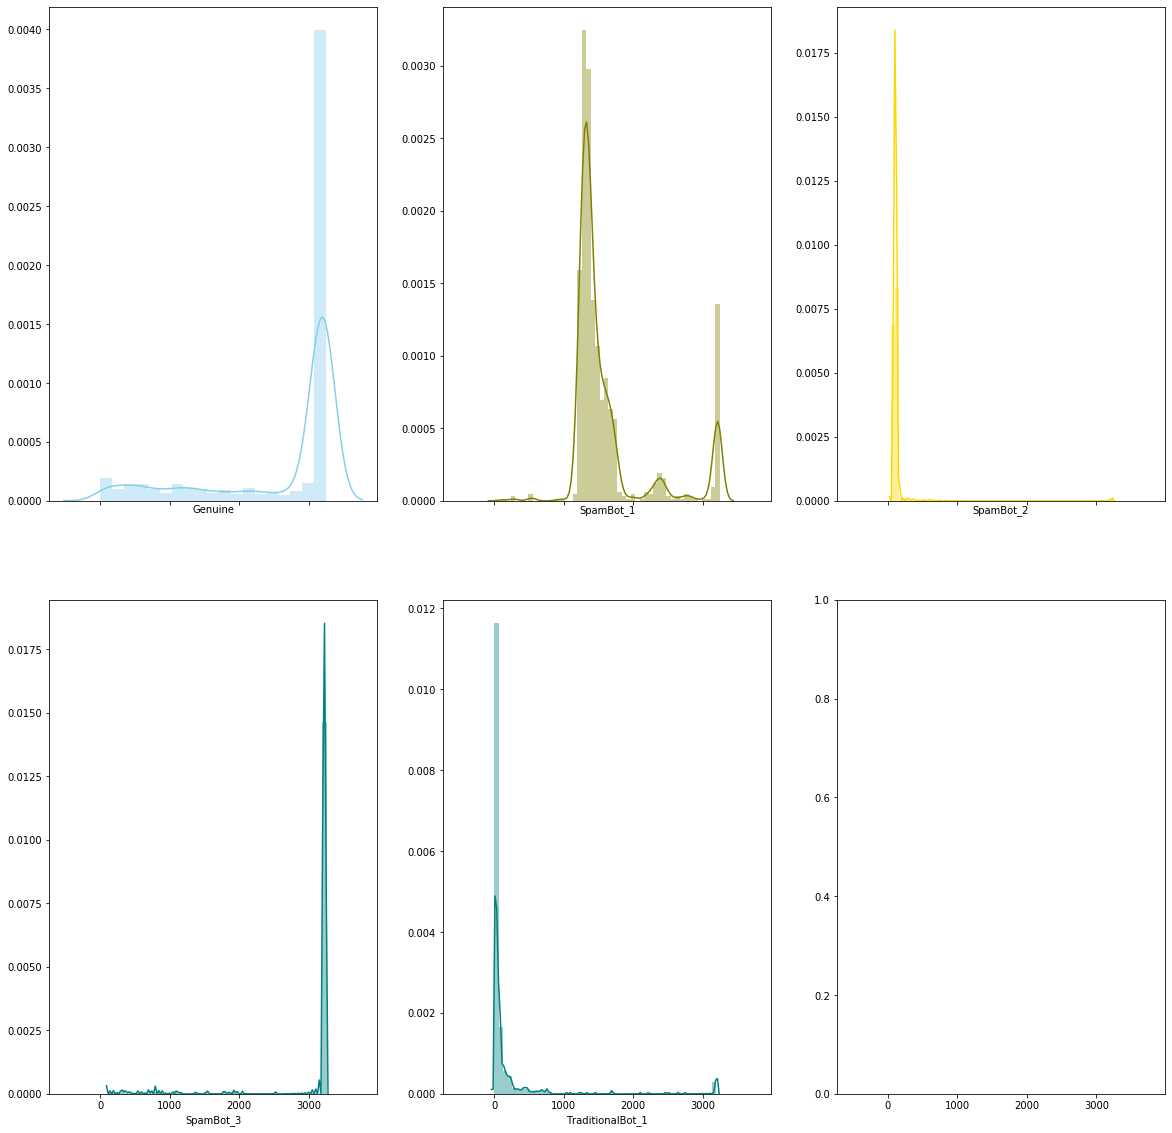

In [8]:
#Histograms
f, axes = plt.subplots(2, 3, figsize=(20, 20), sharex=True)
sns.distplot( d['df1']['user_id'].value_counts() , color="skyblue", axlabel ="Genuine",ax=axes[0, 0])
sns.distplot( d['df2']["user_id"].value_counts() , color="olive", axlabel ="SpamBot_1",ax=axes[0, 1])
sns.distplot( d['df3']["user_id"].value_counts(), color="gold",axlabel ="SpamBot_2", ax=axes[0, 2])
sns.distplot( d['df4']["user_id"].value_counts() , color="teal",axlabel ="SpamBot_3", ax=axes[1, 0])
sns.distplot( d['df5']["user_id"].value_counts() , color="teal", axlabel ="TraditionalBot_1",ax=axes[1, 1])


Concatening all groups

In [9]:
tweets = pd.concat([d['df1'], d['df2'], d['df3'], d['df4'], d['df5']])
tweets.shape

(6441589, 26)

In [10]:
#transform id´s in object
tweets.user_id=tweets.user_id.astype(str)
tweets.id=tweets.id.astype(str)
print(tweets.id.dtypes)
print(tweets.user_id.dtypes)

object
object


In [11]:
#Creating number of tweets columns
tweets['n_tweets']=tweets.groupby(['user_id'])['id'].transform('count')

In [12]:
#to better descriptive plot
tweets.loc[tweets.type!=0, "Class"] = 'Bot'
tweets.loc[tweets.type==0,'Class']= 'Genuino'

proporcao de Bots 0.5592140386479174


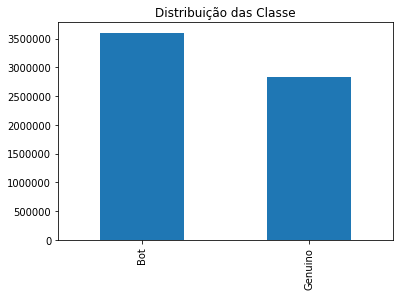

In [13]:
#Proporcao de bots e genuinos
tweets['Class'].value_counts().plot(kind='bar', title= "Distribuição das Classe")
print("proporcao de Bots",tweets[tweets['Class']=='Bot']['id'].count()/tweets.shape[0])

In [14]:
x1=tweets[tweets.type==0]['user_id'].value_counts()
x2=tweets[tweets.type!=0]['user_id'].value_counts()

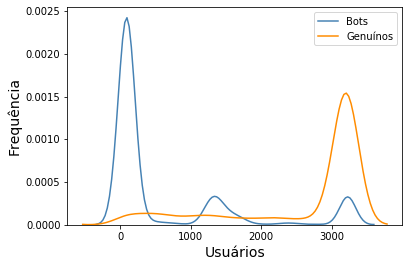

In [18]:
sns.kdeplot(x2, color="steelblue", label= "Bots")
sns.kdeplot(x1, color="darkorange", label="Genuínos")
plt.xlabel('Usuários', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.savefig('figures/hist.png')


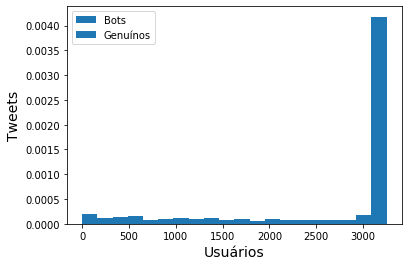

In [27]:
plt.figure()
#line, = ax.plot([1, 2, 3], label='Inline label')
labels= ["Bots","Genuínos"]
#colors = ['orange', 'Blue']
plt.hist([x2,x1],bins=20, density=1,label=labels, alpha=1)
plt.legend(labels)
plt.xlabel("Usuários", fontsize=14) 
plt.ylabel("Tweets", fontsize=14)  
#plt.show()


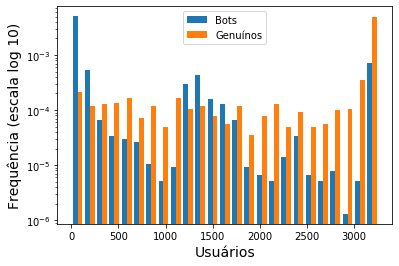

In [18]:
#Stack the data in log scale, to better visualization.
plt.figure()
#line, = ax.plot([1, 2, 3], label='Inline label')
labels= ["Bots","Genuínos"]
colors = ['blue', 'orange']
plt.hist([x2,x1],bins=25, density=1, label=labels, log=True, alpha=1)
plt.legend(labels)
plt.xlabel("Usuários", fontsize=14) 
plt.ylabel("Frequência (escala log 10)", fontsize=14)  
plt.savefig('figures/hist_log10.png')
plt.show()


In [27]:
#verifica situacao de missing data nos conjuntos de tweets
print(tweets.isnull().sum(axis = 0))

id                               0
text                         12987
source                          73
user_id                          0
truncated                  6440836
in_reply_to_status_id            1
in_reply_to_user_id              1
in_reply_to_screen_name    5429614
retweeted_status_id              1
geo                        6441589
place                      6314621
contributors               6441589
retweet_count                    1
reply_count                      1
favorite_count                   1
favorited                  6441589
retweeted                  6441589
possibly_sensitive         6415386
num_hashtags                     1
num_urls                         1
num_mentions                     1
created_at                       1
timestamp                        1
crawled_at                       1
updated                          1
type                             0
n_tweets                         0
Class                            0
dtype: int64


In [28]:
#drop userid null
tweets.dropna(subset=['user_id','text','id','created_at' ], inplace=True)

Features with a lot of missing data and deprecated was droped.  Anothers, than have some important informations about its presence, was missing values filled by 0 or "".


In [29]:
columns= ['truncated','geo','place','contributors','crawled_at','updated', 'created_at', 'retweeted', 'favorited' ,'possibly_sensitive','reply_count']
tweets['in_reply_to_screen_name'].fillna(0, inplace=True)
tweets['source'].fillna("", inplace=True)
tweets.drop(columns=columns, axis=1, inplace=True)


# Filter - Sample

It has many unique tweets. To understand the behavior of the bot, it is necessary to have enought critical mass. That way, I'm going to sample 200 tweets for each user. First, I'll drop all users who have less than 200, hence a random sampling of the remaining ones.



In [30]:
tweets = tweets[(tweets.n_tweets >= 200)]

In [31]:
print("min twiiter",tweets.n_tweets.min(), ': quantify tweets',tweets.shape[0], "of: ", tweets.drop_duplicates('user_id').shape[0], "unique users:" )


min twiiter 200 : quantify tweets 6040225 of:  2682 unique users:


In [32]:
tweets.drop_duplicates('user_id')['Class'].value_counts()

Bot        1637
Genuino    1045
Name: Class, dtype: int64

In [33]:
#user less 200 tweet
(tweets.groupby(['user_id'])['id'].count() <200).sum()

0

In [34]:
#Random sample of 200 tweets for each user
tweets=tweets.groupby('user_id').apply(lambda x: x.sample(n=200)).reset_index(drop=True)

In [36]:
#are you sure, no one has less than 200 tweets?
print("yes, i think so: ",(tweets.user_id.value_counts() <200).sum())

yes, i think so:  0


In [37]:
print("Shape all tweets and users", tweets.shape, "unique users", tweets.drop_duplicates('user_id').shape[0])

Shape all tweets and users (536400, 17) unique users 2682


The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Thererofe, i will drop tweets that have this features as null

In [38]:
#To avoid exeute again all pre-process made so far
#tweets.to_csv('tweets_0.csv', sep=',')

# New features


The data in all groups is controled by created_at feature (oficial field of API). Only in traditional_bot is in a unknow format.That way, i going to use the timestamp feature. It;s important to observe, that the hour is in another UTC (2 hours more). But is do not matter for us.  



In [39]:
# converte datas tabelas de tweets e cria variaveis temporais - Dia - Mes e Ano 
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])
tweets['year_month']=tweets['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
tweets['year_month_day']=tweets['timestamp'].apply(lambda x: '{year}-{month}-{day}'.format(year=x.year, month=x.month, day=x.day))
tweets['year']=tweets['timestamp'].apply(lambda x: '{year}'.format(year=x.year))

    



In [40]:
#means
tweets['n_retweet_mean']=tweets.groupby(['user_id'])['retweet_count'].transform('mean')
tweets['n_favorite_mean']=tweets.groupby(['user_id'])['favorite_count'].transform('mean')
tweets['n_hashtags_mean']=tweets.groupby(['user_id'])['num_hashtags'].transform('mean')
tweets['n_urls_mean']=tweets.groupby(['user_id'])['num_urls'].transform('mean')
tweets['n_mentions_mean']=tweets.groupby(['user_id'])['num_mentions'].transform('mean')
#size of twitter
tweets['size_twitter'] = tweets['text'].astype('str').apply(len)
#mean of size of twiiter
tweets['media_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mean')
#variance of size twitter.
tweets['dp_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mad')

In [41]:
#number of tweets that are reply 
numero_tweets_reply=""
numero_tweets_no_reply=""
tweets['in_reply_to_screen_name']=tweets['in_reply_to_screen_name'].map(lambda x : 1 if x!=0 else x)
#Calulating some values
numero_tweets_reply=tweets.groupby('user_id')['in_reply_to_screen_name'].transform('sum')
#numero_tweets_no_reply=200-numero_tweets_reply
#indicators
tweets['in_tweets_reply']=numero_tweets_reply


In [42]:
#first_tweet - nonsense after sampling
#tweets['first_tweet']=tweets.groupby('user_id')['timestamp'].transform('min')

In [43]:
#another features
aux=pd.DataFrame()
tweets['n_tweet_dia']=tweets.groupby(['user_id','year_month_day'])['id'].transform('count') #Calculo do MAX.
tweets['max_count_tweet_dia']=tweets.groupby('user_id')['n_tweet_dia'].transform('max') # Calculo do In_max.
#tweets['in_tweet_max_dia']=tweets['max_count_tweet_dia']/tweets['n_tweets'] #n_tweets_do_dia_mais_postou/n_total_de_tweets
tweets['count_dias_tweet']= tweets.groupby(['user_id'])['year_month_day'].transform(lambda x: x.nunique()) #quantos dias usou o twiiter
tweets['in_tweet_dia']=200/tweets['count_dias_tweet'] #total de tweets/dia que usouo twitter

### Columns final dataset

In [44]:
tweets.columns

Index(['id', 'text', 'source', 'user_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'retweet_count', 'favorite_count', 'num_hashtags', 'num_urls',
       'num_mentions', 'timestamp', 'type', 'n_tweets', 'Class', 'year_month',
       'year_month_day', 'year', 'n_retweet_mean', 'n_favorite_mean',
       'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean', 'size_twitter',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'n_tweet_dia', 'max_count_tweet_dia', 'count_dias_tweet',
       'in_tweet_dia'],
      dtype='object')

In [45]:
print(tweets.shape)
print(tweets.drop_duplicates('user_id').shape)

(536400, 33)
(2682, 33)


In [46]:
tweets.head(3)

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,timestamp,type,n_tweets,Class,year_month,year_month_day,year,n_retweet_mean,n_favorite_mean,n_hashtags_mean,n_urls_mean,n_mentions_mean,size_twitter,media_size_twitter,dp_size_twitter,in_tweets_reply,n_tweet_dia,max_count_tweet_dia,count_dias_tweet,in_tweet_dia
0,527886874212569088,"It isn't the age, it's the mileage that counts.","<a href=""http://tweetadder.com"" rel=""nofollow""...",1002202471.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2014-10-30 19:16:53,3,3220,Bot,2014-10,2014-10-30,2014,0.005,0.015,0.0,0.445,0.0,47,82.035,22.0199,0,3,8,49,4.081633
1,523988408197451776,Read About the History of the Periodic Chart ...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",1002202471.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,2014-10-20 02:05:46,3,3220,Bot,2014-10,2014-10-20,2014,0.005,0.015,0.0,0.445,0.0,68,82.035,22.0199,0,3,8,49,4.081633
2,514976327976628224,Then close your eyes and tap your heels togeth...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",1002202471.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2014-09-25 05:14:59,3,3220,Bot,2014-9,2014-9-25,2014,0.005,0.015,0.0,0.445,0.0,133,82.035,22.0199,0,8,8,49,4.081633


In [35]:
tweets.to_csv('tweets.csv', sep=',')